## <p style="text-align: center;"> MSAI339 - Data Science Project </p>

## <ins><p style="text-align: center;"> Bridging the Gap: Analyzing Pay Disparities Across Industries </p></ins>

## Team Members:

- **Sree Dhyuti Nimmagadda**
- **Ruchi Bommaraju**
- **Shruti Kalaskar**
- **Divyanka Thakur**


Pay parity is the concept that everyone within the same field should receive competitive compensation, regardless of factors such as **gender**, **ethnicity**, and other personal characteristics. 

As a cornerstone in the fight for **workplace equality**, pay parity is an essential focus and a topic of ongoing debate, as researchers and advocates continue to explore new ways of understanding why these compensation discrepancies still exist.


In [3]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from sklearn.preprocessing import LabelEncoder
from scipy import stats

# Set up Seaborn styling
sns.set(style="whitegrid")

## Understanding the *CurrentPopulationSurvey.csv* Dataset

This dataset, titled **CurrentPopulationSurvey.csv**, was collected by the **U.S. Census Bureau** in collaboration with the **Bureau of Labor Statistics (BLS)** and spans data from **1980 to 2010**. It includes responses gathered through oral inquiry from each family member across various households.

Despite containing a large number of columns (237), this breakdown should help clarify the dataset's structure:

### Column Overview

#### First 63 Columns: Transformed Values

These columns provide transformed or cleaned information on the following attributes:

- **Survey Information**: Year of the survey, household number, locational attributes.
- **Demographics**: Sex, age, race, and nativity.
- **Education**: Details on the individual's educational background.
- **Professional Details**: Employment-related information, working hours, land ownership.
- **Family and Marital Information**: Marital status, family role (head, spouse, child, etc.).
- **Data Quality**: Flags to indicate the quality or reliability of the data.

#### Next 63 Columns: Original Values

- These columns store the original, untransformed data and are prefixed with `o_` for each attribute listed above.

#### Columns 126-128 Onward: Additional Variables

- **Dummy Variables**: Represent categories that were intended for data collection but ultimately could not be fully gathered.
- **Transformed Variables**: Calculated values such as `wage^2`, `experience_years^2`, etc.

#### Final Columns: Flags

- These columns contain flags that specify **industry** and **location** information for each individual.

This breakdown provides an overview of how the data is structured and organized, making it easier to understand and analyze the contents of this comprehensive dataset.


In [4]:
# Load Dataset - Current Population Survey

data = pd.read_csv('/Users/shruti.kalaskar/Documents/Northwestern/Fall 2024/Data Science 339/EDA/CurrentPopulationSurvey.csv')
data

,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,18574,2,970.179993,1,21,39,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
344283,1999,59820,7,1753.010010,1,42,6,3.0,7120.0,6053.0,...,0,0,0,0,0,0,0,0,1,1
344284,1981,58979,3,1971.020020,1,33,48,3.0,NaN,NaN,...,0,0,1,0,0,0,0,0,1,1
344285,2007,33540,2,715.510010,1,22,19,4.0,1960.0,19163.0,...,0,0,0,0,0,0,0,0,1,0


## Meta-data Information

In [5]:

metadata = {
    'Number of Rows': data.shape[0],
    'Number of Columns': data.shape[1],
    'Column Names': data.columns.tolist(),
    'Data Types': data.dtypes.to_dict(),
    'Memory Usage (bytes)': data.memory_usage(deep=True).sum(),
    'Missing Values': data.isnull().sum().to_dict(),  # Count of missing values per column
    'Unique Values': data.nunique().to_dict(),  # Count of unique values per column
    'Statistics': data.describe(include='all').to_dict(),  # Basic statistics for numeric and object types
    'First Few Rows': data.head().to_dict(orient='records'),  # Display the first few rows
    'Last Few Rows': data.tail().to_dict(orient='records'),  # Display the last few rows
}
    

for i in metadata:
    print(i, ":")
    print(metadata[i])
    print("\n\n")


Number of Rows :
344287



Number of Columns :
234



Column Names :
['year', 'serial', 'numprec', 'hwtsupp', 'gq', 'region', 'statefip', 'metro', 'metarea', 'county', 'farm', 'month', 'pernum', 'wtsupp', 'relate', 'age', 'sex', 'race', 'marst', 'popstat', 'bpl', 'yrimmig', 'citizen', 'mbpl', 'fbpl', 'nativity', 'hispan', 'sch', 'educ99', 'schlcoll', 'empstat', 'labforce', 'occ', 'occ1990', 'ind1990', 'occ1950', 'ind', 'ind1950', 'classwkr', 'occly', 'occ50ly', 'indly', 'ind50ly', 'classwly', 'wkswork1', 'wkswork2', 'hrswork', 'uhrswork', 'union', 'incwage', 'incbus', 'incfarm', 'inclongj', 'oincwage', 'srcearn', 'ftype', 'quhrswor', 'qwkswork', 'qincbus', 'qincfarm', 'qinclong', 'qincwage', 'qsrcearn', 'o_numprec', 'o_hwtsupp', 'o_gq', 'o_region', 'o_statefip', 'o_metro', 'o_metarea', 'o_county', 'o_farm', 'o_month', 'o_pernum', 'o_wtsupp', 'o_relate', 'o_age', 'o_sex', 'o_race', 'o_marst', 'o_popstat', 'o_bpl', 'o_yrimmig', 'o_citizen', 'o_mbpl', 'o_fbpl', 'o_nativity', 'o_hispan', '

## Data Preprocessing

* Remove extremely sparse columns altogether

In [6]:
# We have ~34000000 rows, we can set a threshold and remove columns with values less that that

threshold = 10000

# Function to count non-null values in a column
def count_not_null_vals_col(df, col_name):
    if col_name in df.columns:
        non_null_cnt = df[col_name].notnull().sum()
        return int(non_null_cnt)
    else:
        return ValueError(f"Column {col_name} not found in dataset.")
    

# Remove columns with values less than threshold
new_data = data.copy()
for col in data.columns:
    nonnull_num = count_not_null_vals_col(data, col)
    if (nonnull_num < threshold):
        print(f"Removing column {col} from dataset as it has only {nonnull_num} non-null values in dataset")
        new_data = new_data.drop(col, axis=1)

new_data

Removing column unmatched_fem_81 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_male_81 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_occ_90 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_ind_90 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_occ_99 from dataset as it has only 0 non-null values in dataset
Removing column unmatched_ind_99 from dataset as it has only 0 non-null values in dataset


,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,18574,2,970.179993,1,21,39,3.0,NaN,NaN,...,0,0,0,0,0,0,0,0,1,0
344283,1999,59820,7,1753.010010,1,42,6,3.0,7120.0,6053.0,...,0,0,0,0,0,0,0,0,1,1
344284,1981,58979,3,1971.020020,1,33,48,3.0,NaN,NaN,...,0,0,1,0,0,0,0,0,1,1
344285,2007,33540,2,715.510010,1,22,19,4.0,1960.0,19163.0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
irrelevant_cols_to_drop = ["serial", "gq", "month", "wtsupp", "popstat", 
                           "empstat", "labforce", "classwly", "incbus", 
                           "incfarm", "qincbus", "qincfarm", "qincwage", 
                           "o_gq", "o_month", "o_popstat", "o_labforce", 
                           "o_incbus", "o_incfarm", "o_qincwage", "groupquar", 
                           "selfemp", "military", "employed", "lnrwg", "notalloc", 
                           "basesamp", "female", "sumadj_ind", "sumadj_occ", 
                           "wkswork2", "numprec", "occ1950", "ind1950", "occ50ly", 
                           "ind50ly", "adj_occ", "adj_ind", "adj_ind2", "adj_occ2", 
                           "adj_occ2name", "potexp2", "o_race", 'bpl', 'mbpl', 'fbpl', 
                           'occ', 'occ1990', 'ind1990', 'ind', 'occly', 'indly', 'oincwage',
                            'ftype', 'quhrswor', 'qwkswork', 'quhrswor', 'qwkswork', 'qsrcearn',
                             'origrace', 'educorig', 'ft', 'niincwage', 'tcoincwage', 'tcinclongj',
                              'tcincwage', 'expendbase10', 'inflate', 'realhrwage', 'uncenrealhrwage',
                               'wagesamp', 'occ_orig', 'ind_orig', 'un_lnrealwg' ]

new_data = new_data.drop(irrelevant_cols_to_drop, axis=1)
print(len(irrelevant_cols_to_drop), " irrelevant columns are being dropped")

74  irrelevant columns are being dropped


As explained earlier, some of the columns in the dataset represent categories that can be combined into single columns for better clarity and analysis. Here’s a breakdown of these categories:

### Combined Columns

#### 1. Industry Columns
Instead of having multiple flags for each industry, we can consolidate them into one column:
- **Industry**: Agriculture, Mining, Construction, Durables, Nondurables, Transport, Utilities, Communications, Retail Trade, Wholesale Trade, Finance, SocArtOther, Hotels & Restaurants, Medical, Education, Professional, Public Administration.

#### 2. Regional Columns
- **Region**: Northeast, North Central, South, West.

#### 3. Occupation Columns
- **Occupation**: Manager, Business, Financial Operations, Computer, Architect, Scientist, Social Worker, Post-Secondary Education, Legal Education, Artist, Lawyer, Physician, Healthcare, Health Support, Protective Services, Food Care, Building, Sales, Office Administration, Farmer, Production, Transport, Construction, Extraction, Installation.

#### 4. Race Columns
- **Race**: White, Black, Other Race, Hispanic.

#### 5. Education Columns
- **Education**: High School, Other Education, Bachelor's, Advanced, Potential Experience, Less than High School.

#### 6. Personal Columns
- **Personal Details**: Household Support, Region, State FIPS Code, Metro Area, Person Number, Relationship, Age, Sex, Race, Marital Status, Family Type, Original Metro Area, Original Hispanic, Person Experience, Expenditure Base 10, Inflation, Household Cohort.

#### 7. Professional Meta Details
- **Professional Information**: Occupation, Occupation 1990, Industry 1990, Industry, Class Worker, Occupation Level, Industry Level, Weeks Worked, Hours Worked, Income Wage, Original Hours Worked, Full-Time Status, Total Income Wage, Hourly Wage, Real Hourly Wage, Wage Sample, Annual Hours.

* Club columns 

(Lucky for us, all the mentioned combinings are in a one-hot encoding format and can be clubbed easily)

In [8]:
# Region columns
region_columns = ['northeast','northcentral', 'south', 'west']

# Industry columns
industry_columns = ['Agriculture', 'miningconstruction', 'durables', 'nondurables', 
                    'Transport', 'Utilities', 'Communications', 'retailtrade', 'wholesaletrade', 
                    'finance', 'SocArtOther', 'hotelsrestaurants', 'Medical','Education', 'professional', 'publicadmin']

# Occupation columns
occupation_columns = ['manager', 'business', 'financialop', 'computer', 
                      'architect', 'scientist', 'socialworker', 'postseceduc', 
                      'legaleduc', 'artist', 'lawyerphysician', 'healthcare', 'healthsupport', 
                      'protective', 'foodcare', 'building', 'sales', 'officeadmin', 
                      'farmer', 'production', 'transport', 'constructextractinstall']

# Race columns
# All rows wehre hispan is nan the other columns have values so just replace nan with zero
race_columns = ['white', 'black', 'othrace', 'hispan']


# Education columns
education_columns = ["sch", "o_educ", "ba", "adv", "potexp", "LEHS"]


# # Personal columns
# personal_columns = ["hwtsupp", "region", "statefip", "metro", "pernum", 
#                     "relate", "age", "sex", "race", "marst", "ftype", 
#                     "o_metarea", "o_hispan", "perconexp", "expendbase10", "inflate", "hdwfcoh"]


# # Proffessional Meta Details
# professional_meta_dets_colums = ["occ", "occ1990", "ind1990", "ind", "classwkr", "occly", "indly", 
#                                  "wkswork1", "uhrswork", "incwage", "o_hrswork", "ft", "tcincwage", 
#                                  "hrwage", "realhrwage", "wagesamp", "annhrs"]


# Function to combine above list of columns to one column each
def combine_categorical_cols_to_one_col(df, list_of_cols):

    # encoding of the new_column for none
    none_enc = len(list_of_cols)
    vals = []
    for row in df.iterrows():
        exists = 0
        for col_name in list_of_cols:
            if(row[1][col_name] == 1):
                exists = 1
                vals.append(list_of_cols.index(col_name))
                break
        
        if (exists == 0):
            vals.append(none_enc)
    return vals



lists = [(region_columns, 'region'), (industry_columns, 'industry'), (occupation_columns, 'occupation'),
         (race_columns, 'race'), (education_columns, 'education')]


for lst in lists:
    list_of_cols = lst[0]
    lst_name = lst[1]

    # List with new encoded column values
    new_col = combine_categorical_cols_to_one_col(new_data, list_of_cols)

    # Drop extra columns
    new_data = new_data.drop(list_of_cols, axis=1)
    print(f'Dropped {len(list_of_cols)} columns from the category - {lst_name}  and added just one column with the same name')

    # Add the one combined-encoded column
    new_data[lst_name] = new_col
    


Dropped 4 columns from the category - region  and added just one column with the same name
Dropped 16 columns from the category - industry  and added just one column with the same name
Dropped 22 columns from the category - occupation  and added just one column with the same name
Dropped 4 columns from the category - race  and added just one column with the same name
Dropped 6 columns from the category - education  and added just one column with the same name


In [9]:
new_data.head()

,year,hwtsupp,region,statefip,metro,metarea,county,farm,pernum,relate,...,ind_1999,occ2000_90,ind2000_90,indname2000_90,occ2000_99,ind2000_99,indname2000_99,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,NaN,1.0,1,101,...,NaN,526.0,837.0,Individual and family services,NaN,NaN,NaN,10,17,5
1,2009,971.200012,2,5,2.0,NaN,NaN,NaN,4,1260,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,NaN,1.0,1,101,...,NaN,154.0,309.0,Commercial and service industry machinery manu...,NaN,NaN,NaN,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,NaN,1.0,1,101,...,NaN,102.0,738.0,Computer systems design and related services,NaN,NaN,NaN,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,NaN,1.0,1,101,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14,0,5


In [10]:
# Min no of non-null values
threshold = 20000

new_data = new_data.dropna(axis=1, thresh=threshold)

In [11]:
# Columns with NaN values
nan_count = new_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)


No of columns with NaN values: 50



Columns with NaN values and their counts
metro               9759
metarea           103939
county            235427
farm              256875
yrimmig           298083
citizen           299748
nativity           87824
educ99             87412
schlcoll          299686
hrswork            10555
union              42379
inclongj           42379
srcearn            42379
qinclong           42379
o_county           87412
o_farm            256875
o_bpl              87412
o_yrimmig          87412
o_citizen          87412
o_mbpl             87412
o_fbpl             87412
o_nativity         87412
o_educ99           87412
o_schlcoll         42379
o_union            42379
o_inclongj         42379
o_oincwage         42379
o_srcearn          42379
o_quhrswor         42379
o_qwkswork         42379
occ_2010_orig     236640
ind_2002_orig     287820
ind_2007_orig     181023
occ_81            301908
ind_81            301908
occ_2000female    301908
occ_2000male      3019

In [12]:
# Drop cols with more nan values (> 50%)

# Calculate the percentage of NaN values for each column
nan_percentage = new_data.isnull().mean() * 100

percentage = 50
# Identify columns to drop (more than 50% NaN)
columns_to_drop = nan_percentage[nan_percentage > percentage].index

# Drop columns with more than 50% NaN values
new_data = new_data.drop(columns=columns_to_drop)

In [13]:
# Remove all cols with prefix 'o_'ArithmeticError
new_data = new_data.drop(columns=new_data.filter(like='o_').columns)

In [14]:
for i in new_data.columns:
    print(i)

year
hwtsupp
region
statefip
metro
metarea
pernum
relate
age
sex
race
marst
nativity
educ99
classwkr
wkswork1
hrswork
uhrswork
union
incwage
inclongj
srcearn
qinclong
hisp
annhrs
incwageman
hrwage
perconexp
hdwfcoh
industry
occupation
education


In [15]:
new_data

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,qinclong,hisp,annhrs,incwageman,hrwage,perconexp,hdwfcoh,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,1,...,0.0,1,1820,14200.0,7.802198,64.639999,1,10,17,5
1,2009,971.200012,2,5,2.0,NaN,4,1260,28,1,...,0.0,0,2080,17680.0,8.500000,100.063004,0,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,1,...,0.0,0,2080,28000.0,13.461538,64.639999,1,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,1,...,0.0,0,2115,27500.0,13.002364,64.639999,1,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,1,...,NaN,0,2080,17000.0,8.173077,43.977001,1,14,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
344282,1981,970.179993,1,39,3.0,NaN,2,1260,28,2,...,NaN,0,2340,17000.0,7.264957,43.977001,0,13,6,3
344283,1999,1753.010010,3,6,3.0,7120.0,4,301,27,2,...,0.0,0,360,3200.0,8.888889,79.933998,0,0,0,5
344284,1981,1971.020020,2,48,3.0,NaN,2,201,36,2,...,NaN,0,2080,13000.0,6.250000,43.977001,1,7,16,5
344285,2007,715.510010,1,19,4.0,1960.0,2,201,49,2,...,0.0,0,250,8800.0,35.200001,94.727997,1,14,9,3


# EDA

In [16]:
new_data.to_csv('processed_dataset.csv', index=False)
new_data = pd.read_csv('/Users/shruti.kalaskar/Documents/Northwestern/Fall 2024/Data Science 339/EDA/processed_dataset.csv')
new_data.head()

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,qinclong,hisp,annhrs,incwageman,hrwage,perconexp,hdwfcoh,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,1,...,0.0,1,1820,14200.0,7.802198,64.639999,1,10,17,5
1,2009,971.200012,2,5,2.0,NaN,4,1260,28,1,...,0.0,0,2080,17680.0,8.500000,100.063004,0,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,1,...,0.0,0,2080,28000.0,13.461538,64.639999,1,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,1,...,0.0,0,2115,27500.0,13.002364,64.639999,1,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,1,...,NaN,0,2080,17000.0,8.173077,43.977001,1,14,0,5


In [17]:
nan_count = new_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)

No of columns with NaN values: 9



Columns with NaN values and their counts
metro         9759
metarea     103939
nativity     87824
educ99       87412
hrswork      10555
union        42379
inclongj     42379
srcearn      42379
qinclong     42379
dtype: int64


In [18]:
new_data.columns

Index(['year', 'hwtsupp', 'region', 'statefip', 'metro', 'metarea', 'pernum',
       'relate', 'age', 'sex', 'race', 'marst', 'nativity', 'educ99',
       'classwkr', 'wkswork1', 'hrswork', 'uhrswork', 'union', 'incwage',
       'inclongj', 'srcearn', 'qinclong', 'hisp', 'annhrs', 'incwageman',
       'hrwage', 'perconexp', 'hdwfcoh', 'industry', 'occupation',
       'education'],
      dtype='object')

In [19]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# Create an IterativeImputer instance
imputer = IterativeImputer(max_iter=10, random_state=0)

# Fit and transform the data to perform multiple imputation
new_data[['hwtsupp']] = imputer.fit_transform(new_data[['hwtsupp']])

print(new_data[['hwtsupp']])

            hwtsupp
0       1052.650024
1        971.200012
2       1622.280029
3       2689.909912
4       1911.900024
...             ...
344282   970.179993
344283  1753.010010
344284  1971.020020
344285   715.510010
344286   820.739990

[344287 rows x 1 columns]


In [20]:
new_data['region'] = new_data['region'].fillna(new_data['region'].mode()[0])
print(new_data['region'])
missing_values = new_data['region'].isna()
print("Total missing values in 'region':", missing_values.sum())

# Print the rows with missing values
print("\nRows with missing values in 'region':")
print(new_data[missing_values])

0         0
1         2
2         0
3         3
4         2
         ..
344282    1
344283    3
344284    2
344285    1
344286    3
Name: region, Length: 344287, dtype: int64
Total missing values in 'region': 0

Rows with missing values in 'region':
Empty DataFrame
Columns: [year, hwtsupp, region, statefip, metro, metarea, pernum, relate, age, sex, race, marst, nativity, educ99, classwkr, wkswork1, hrswork, uhrswork, union, incwage, inclongj, srcearn, qinclong, hisp, annhrs, incwageman, hrwage, perconexp, hdwfcoh, industry, occupation, education]
Index: []

[0 rows x 32 columns]


In [21]:
imputed_data = new_data.copy()
imputed_data.to_csv('imputed_data.csv', index=False)

In [22]:
imputed_data.head()

,year,hwtsupp,region,statefip,metro,metarea,pernum,relate,age,sex,...,qinclong,hisp,annhrs,incwageman,hrwage,perconexp,hdwfcoh,industry,occupation,education
0,1990,1052.650024,0,36,2.0,5607.0,1,101,58,1,...,0.0,1,1820,14200.0,7.802198,64.639999,1,10,17,5
1,2009,971.200012,2,5,2.0,NaN,4,1260,28,1,...,0.0,0,2080,17680.0,8.500000,100.063004,0,11,17,5
2,1990,1622.280029,0,36,3.0,5607.0,1,101,37,1,...,0.0,0,2080,28000.0,13.461538,64.639999,1,2,4,5
3,1990,2689.909912,3,6,3.0,7400.0,1,101,34,1,...,0.0,0,2115,27500.0,13.002364,64.639999,1,14,3,3
4,1981,1911.900024,2,51,3.0,8840.0,1,101,38,1,...,NaN,0,2080,17000.0,8.173077,43.977001,1,14,0,5


In [23]:
nan_count = imputed_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)

No of columns with NaN values: 9



Columns with NaN values and their counts
metro         9759
metarea     103939
nativity     87824
educ99       87412
hrswork      10555
union        42379
inclongj     42379
srcearn      42379
qinclong     42379
dtype: int64


In [24]:
imputed_data = imputed_data.drop(columns=['metarea'], inplace=True)

In [25]:
imputed_data = pd.DataFrame(new_data)

# Drop the 'metarea' column
imputed_data = imputed_data.drop(columns=['metarea'])

# Print the updated imputed_data
print(imputed_data)

        year      hwtsupp  region  statefip  metro  pernum  relate  age  sex  \
0       1990  1052.650024       0        36    2.0       1     101   58    1   
1       2009   971.200012       2         5    2.0       4    1260   28    1   
2       1990  1622.280029       0        36    3.0       1     101   37    1   
3       1990  2689.909912       3         6    3.0       1     101   34    1   
4       1981  1911.900024       2        51    3.0       1     101   38    1   
...      ...          ...     ...       ...    ...     ...     ...  ...  ...   
344282  1981   970.179993       1        39    3.0       2    1260   28    2   
344283  1999  1753.010010       3         6    3.0       4     301   27    2   
344284  1981  1971.020020       2        48    3.0       2     201   36    2   
344285  2007   715.510010       1        19    4.0       2     201   49    2   
344286  2013   820.739990       3        49    NaN       2     201   36    2   

        race  ...  qinclong  hisp  annh

In [26]:
imputed_data['metro'].fillna(imputed_data['metro'].mode()[0], inplace=True)  # Mode for metro
imputed_data['nativity'].fillna(imputed_data['nativity'].mode()[0], inplace=True)  # Mode for nativity
imputed_data['educ99'].fillna(imputed_data['educ99'].mode()[0], inplace=True)  # Mode for educ99
imputed_data['hrswork'].fillna(imputed_data['hrswork'].median(), inplace=True)  # Median for hrswork
imputed_data['union'].fillna(imputed_data['union'].mode()[0], inplace=True)  # Mode for union
imputed_data['inclongj'].fillna(imputed_data['inclongj'].median(), inplace=True)  # Median for inclongj
imputed_data['srcearn'].fillna(imputed_data['srcearn'].mode()[0], inplace=True)  # Mode for srcearn
imputed_data = imputed_data.drop(columns=['qinclong'])

# Print the updated imputed_data
print("Imputed DataFrame:")
print(imputed_data)

Imputed DataFrame:
        year      hwtsupp  region  statefip  metro  pernum  relate  age  sex  \
0       1990  1052.650024       0        36    2.0       1     101   58    1   
1       2009   971.200012       2         5    2.0       4    1260   28    1   
2       1990  1622.280029       0        36    3.0       1     101   37    1   
3       1990  2689.909912       3         6    3.0       1     101   34    1   
4       1981  1911.900024       2        51    3.0       1     101   38    1   
...      ...          ...     ...       ...    ...     ...     ...  ...  ...   
344282  1981   970.179993       1        39    3.0       2    1260   28    2   
344283  1999  1753.010010       3         6    3.0       4     301   27    2   
344284  1981  1971.020020       2        48    3.0       2     201   36    2   
344285  2007   715.510010       1        19    4.0       2     201   49    2   
344286  2013   820.739990       3        49    3.0       2     201   36    2   

        race  ...  s

/var/folders/zz/y2_h9x0s2378k58hfr7vvwmh0000gn/T/ipykernel_2086/3788765836.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  imputed_data['metro'].fillna(imputed_data['metro'].mode()[0], inplace=True)  # Mode for metro
/var/folders/zz/y2_h9x0s2378k58hfr7vvwmh0000gn/T/ipykernel_2086/3788765836.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate

In [27]:
nan_count = imputed_data.isnull().sum()
nan_columns_with_count = nan_count[nan_count > 0]

print(f"No of columns with NaN values: {len(nan_columns_with_count)}\n\n")
print("\nColumns with NaN values and their counts")
print(nan_columns_with_count)

No of columns with NaN values: 0



Columns with NaN values and their counts
Series([], dtype: int64)


In [28]:
imputed_data.head()

,year,hwtsupp,region,statefip,metro,pernum,relate,age,sex,race,...,srcearn,hisp,annhrs,incwageman,hrwage,perconexp,hdwfcoh,industry,occupation,education
0,1990,1052.650024,0,36,2.0,1,101,58,1,3,...,1.0,1,1820,14200.0,7.802198,64.639999,1,10,17,5
1,2009,971.200012,2,5,2.0,4,1260,28,1,0,...,1.0,0,2080,17680.0,8.500000,100.063004,0,11,17,5
2,1990,1622.280029,0,36,3.0,1,101,37,1,0,...,1.0,0,2080,28000.0,13.461538,64.639999,1,2,4,5
3,1990,2689.909912,3,6,3.0,1,101,34,1,0,...,1.0,0,2115,27500.0,13.002364,64.639999,1,14,3,3
4,1981,1911.900024,2,51,3.0,1,101,38,1,2,...,1.0,0,2080,17000.0,8.173077,43.977001,1,14,0,5


In [29]:
import pandas as pd
import scipy.stats as stats
import numpy as np

#### Hypothesis Testing

In [30]:
imputed_data.columns

Index(['year', 'hwtsupp', 'region', 'statefip', 'metro', 'pernum', 'relate',
       'age', 'sex', 'race', 'marst', 'nativity', 'educ99', 'classwkr',
       'wkswork1', 'hrswork', 'uhrswork', 'union', 'incwage', 'inclongj',
       'srcearn', 'hisp', 'annhrs', 'incwageman', 'hrwage', 'perconexp',
       'hdwfcoh', 'industry', 'occupation', 'education'],
      dtype='object')

In [31]:
#Categorize columns as numerical or categorical.

# Numerical columns
numerical_cols = [
    "year", "hwtsupp", "age", "wkswork1", "hrswork", "uhrswork", "incwage", 
    "inclongj", "annhrs", "incwageman", "hrwage", "perconexp"
]

# Categorical columns
categorical_cols = [
    "region", "statefip", "metro", "pernum", "relate", "sex", "race", 
    "marst", "nativity", "educ99", "classwkr", "union", "srcearn", 
    "hisp", "hdwfcoh", "industry", "occupation", "education"
]


In [32]:
# Pearson Correlation for Numerical vs. Numerical

def numerical_vs_numerical(imputed_data, numerical_cols):
    print("Numerical vs. Numerical Hypothesis Testing:\n")
    for i in range(len(numerical_cols)):
        for j in range(i + 1, len(numerical_cols)):
            col1, col2 = numerical_cols[i], numerical_cols[j]
            data = imputed_data[[col1, col2]].dropna()
            if len(data) > 1:  # Ensure there's enough data to perform correlation
                corr, p_value = stats.pearsonr(data[col1], data[col2])
                print(f"Pearson Correlation between {col1} and {col2}:")
                print(f"  Correlation: {corr:.4f}, P-value: {p_value:.4e}\n")

In [33]:
# T-Test or ANOVA for Categorical vs. Numerical
def categorical_vs_numerical(imputed_data, categorical_cols, numerical_cols):
    print("Categorical vs. Numerical Hypothesis Testing:\n")
    for cat_col in categorical_cols:
        for num_col in numerical_cols:
            unique_values = imputed_data[cat_col].nunique()
            if unique_values == 2:  # Perform T-test for binary categories
                groups = [group[num_col].dropna() for _, group in imputed_data.groupby(cat_col)]
                t_stat, p_value = stats.ttest_ind(groups[0], groups[1])
                print(f"T-test between {cat_col} groups for {num_col}:")
                print(f"  T-statistic: {t_stat:.4f}, P-value: {p_value:.4e}\n")
            elif unique_values > 2:  # Perform ANOVA for multiple categories
                groups = [group[num_col].dropna() for _, group in imputed_data.groupby(cat_col)]
                f_stat, p_value = stats.f_oneway(*groups)
                print(f"ANOVA between {cat_col} groups for {num_col}:")
                print(f"  F-statistic: {f_stat:.4f}, P-value: {p_value:.4e}\n")

In [34]:
# Chi-Square Test for Categorical vs. Categorical
def categorical_vs_categorical(imputed_data, categorical_cols):
    print("Categorical vs. Categorical Hypothesis Testing:\n")
    for i in range(len(categorical_cols)):
        for j in range(i + 1, len(categorical_cols)):
            col1, col2 = categorical_cols[i], categorical_cols[j]
            contingency_table = pd.crosstab(imputed_data[col1], imputed_data[col2])
            if contingency_table.size > 0:
                chi2_stat, p_value, dof, _ = stats.chi2_contingency(contingency_table)
                print(f"Chi-square test between {col1} and {col2}:")
                print(f"  Chi-square Statistic: {chi2_stat:.4f}, P-value: {p_value:.4e}, Degrees of freedom: {dof}\n")


In [35]:
numerical_vs_numerical(imputed_data, numerical_cols)

Numerical vs. Numerical Hypothesis Testing:

Pearson Correlation between year and hwtsupp:
  Correlation: 0.0185, P-value: 2.4986e-27

Pearson Correlation between year and age:
  Correlation: 0.1108, P-value: 0.0000e+00

Pearson Correlation between year and wkswork1:
  Correlation: 0.0618, P-value: 1.3169e-288

Pearson Correlation between year and hrswork:
  Correlation: -0.0093, P-value: 4.4455e-08

Pearson Correlation between year and uhrswork:
  Correlation: 0.0142, P-value: 9.0247e-17

Pearson Correlation between year and incwage:
  Correlation: 0.2810, P-value: 0.0000e+00

Pearson Correlation between year and inclongj:
  Correlation: 0.1896, P-value: 0.0000e+00

Pearson Correlation between year and annhrs:
  Correlation: 0.0417, P-value: 2.2591e-132

Pearson Correlation between year and incwageman:
  Correlation: 0.2810, P-value: 0.0000e+00

Pearson Correlation between year and hrwage:
  Correlation: 0.0130, P-value: 2.3851e-14

Pearson Correlation between year and perconexp:
  Co

In [36]:
categorical_vs_numerical(new_data, categorical_cols, numerical_cols)

Categorical vs. Numerical Hypothesis Testing:

ANOVA between region groups for year:
  F-statistic: 56.5653, P-value: 1.5112e-36

ANOVA between region groups for hwtsupp:
  F-statistic: 4351.8709, P-value: 0.0000e+00

ANOVA between region groups for age:
  F-statistic: 168.2893, P-value: 5.0549e-109

ANOVA between region groups for wkswork1:
  F-statistic: 69.5053, P-value: 6.2880e-45

ANOVA between region groups for hrswork:
  F-statistic: 93.3492, P-value: 2.1922e-60

ANOVA between region groups for uhrswork:
  F-statistic: 135.6857, P-value: 7.3866e-88

ANOVA between region groups for incwage:
  F-statistic: 207.6661, P-value: 1.3785e-134

ANOVA between region groups for inclongj:
  F-statistic: 212.3599, P-value: 1.2879e-137

ANOVA between region groups for annhrs:
  F-statistic: 120.7724, P-value: 3.5291e-78

ANOVA between region groups for incwageman:
  F-statistic: 207.6661, P-value: 1.3785e-134

ANOVA between region groups for hrwage:
  F-statistic: 0.4104, P-value: 7.4552e-01


/Users/shruti.kalaskar/Library/Python/3.9/lib/python/site-packages/scipy/stats/_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


ANOVA between union groups for hwtsupp:
  F-statistic: 306.2751, P-value: 1.4655e-198

ANOVA between union groups for age:
  F-statistic: 104.9272, P-value: 6.8197e-68

ANOVA between union groups for wkswork1:
  F-statistic: 7.9603, P-value: 2.6465e-05

ANOVA between union groups for hrswork:
  F-statistic: 20.9128, P-value: 1.5325e-13

ANOVA between union groups for uhrswork:
  F-statistic: 19.5737, P-value: 1.1056e-12

ANOVA between union groups for incwage:
  F-statistic: 44.0718, P-value: 1.8274e-28

ANOVA between union groups for inclongj:
  F-statistic: 44.3817, P-value: 1.1522e-28

ANOVA between union groups for annhrs:
  F-statistic: 17.2817, P-value: 3.2385e-11

ANOVA between union groups for incwageman:
  F-statistic: 44.0718, P-value: 1.8274e-28

ANOVA between union groups for hrwage:
  F-statistic: 0.2892, P-value: 8.3323e-01

ANOVA between union groups for perconexp:
  F-statistic: 853.8269, P-value: 0.0000e+00

T-test between srcearn groups for year:
  T-statistic: 5.3442

In [37]:
categorical_vs_categorical(new_data, categorical_cols)

Categorical vs. Categorical Hypothesis Testing:

Chi-square test between region and statefip:
  Chi-square Statistic: 1032861.0000, P-value: 0.0000e+00, Degrees of freedom: 150

Chi-square test between region and metro:
  Chi-square Statistic: 6877.0101, P-value: 0.0000e+00, Degrees of freedom: 9

Chi-square test between region and pernum:
  Chi-square Statistic: 958.5781, P-value: 1.2351e-173, Degrees of freedom: 42

Chi-square test between region and relate:
  Chi-square Statistic: 1307.7185, P-value: 4.8818e-249, Degrees of freedom: 39

Chi-square test between region and sex:
  Chi-square Statistic: 177.7504, P-value: 2.6993e-38, Degrees of freedom: 3

Chi-square test between region and race:
  Chi-square Statistic: 37357.6520, P-value: 0.0000e+00, Degrees of freedom: 9

Chi-square test between region and marst:
  Chi-square Statistic: 959.0809, P-value: 7.8955e-195, Degrees of freedom: 15

Chi-square test between region and nativity:
  Chi-square Statistic: 8234.9190, P-value: 0.00

In [70]:
imputed_data.head()

,year,hwtsupp,region,statefip,metro,pernum,relate,age,sex,race,...,srcearn,hisp,annhrs,incwageman,hrwage,perconexp,hdwfcoh,industry,occupation,education
0,1990,1052.650024,0,36,2.0,1,101,58,1,3,...,1.0,1,1820,14200.0,7.802198,64.639999,1,10,17,5
1,2009,971.200012,2,5,2.0,4,1260,28,1,0,...,1.0,0,2080,17680.0,8.500000,100.063004,0,11,17,5
2,1990,1622.280029,0,36,3.0,1,101,37,1,0,...,1.0,0,2080,28000.0,13.461538,64.639999,1,2,4,5
3,1990,2689.909912,3,6,3.0,1,101,34,1,0,...,1.0,0,2115,27500.0,13.002364,64.639999,1,14,3,3
4,1981,1911.900024,2,51,3.0,1,101,38,1,2,...,1.0,0,2080,17000.0,8.173077,43.977001,1,14,0,5


### Column Explanations

- **year**: The year when the data was collected.
- **hwtsupp**: Household weight supplement, used for survey sampling adjustments.
- **region**: Geographic region in the U.S. where the respondent lives.
- **statefip**: FIPS (Federal Information Processing Standards) code for U.S. state.
- **metro**: Indicates whether the individual lives in a metropolitan area.
- **metarea**: Code for specific metropolitan area.
- **pernum**: Person number within the household, unique to each household member.
- **relate**: Relationship of the individual to the head of the household.
- **age**: Age of the individual.
- **sex**: Gender of the individual (e.g., Male, Female).
- **race**: Self-identified race of the individual.
- **marst**: Marital status of the individual.
- **nativity**: Nativity status, indicating whether the individual was born in the U.S.
- **educ99**: Education level of the individual based on 1990 census classification.
- **classwkr**: Class of worker (e.g., private sector, government, self-employed).
- **wkswork1**: Weeks worked in the past year.
- **hrswork**: Usual hours worked per week.
- **uhrswork**: Usual hours worked per week in main job.
- **union**: Union membership status.
- **incwage**: Wage income of the individual.
- **inclongj**: Longest job wage income.
- **srcearn**: Source of earnings (e.g., wages, business income).
- **qinclong**: Quality of reported longest job wage income.
- **hisp**: Hispanic ethnicity indicator.
- **annhrs**: Annual hours worked.
- **incwageman**: Wage income of the individual, manually adjusted.
- **hrwage**: Hourly wage.
- **perconexp**: Person's contribution to household expenses.
- **hdwfcoh**: Head of household welfare cohort.
- **industry**: General industry classification.
- **occupation**: General occupation classification.
- **education**: Education level of the individual.


- **annhrs**: Annual hours worked.
- **incwageman**: Wage income of the individual, manually adjusted.
- **hrwage**: Hourly wage.
- **perconexp**: Person's contribution to household expenses.
- **hdwfcoh**: Head of household welfare cohort.
- **industry**: General industry classification.
- **occupation**: General occupation classification.
- **education**: Education level of the individual.

In [55]:
#for column in imputed_data.columns:
#    print(f"Unique values in '{'education'}': {imputed_data['education'].unique()}")

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

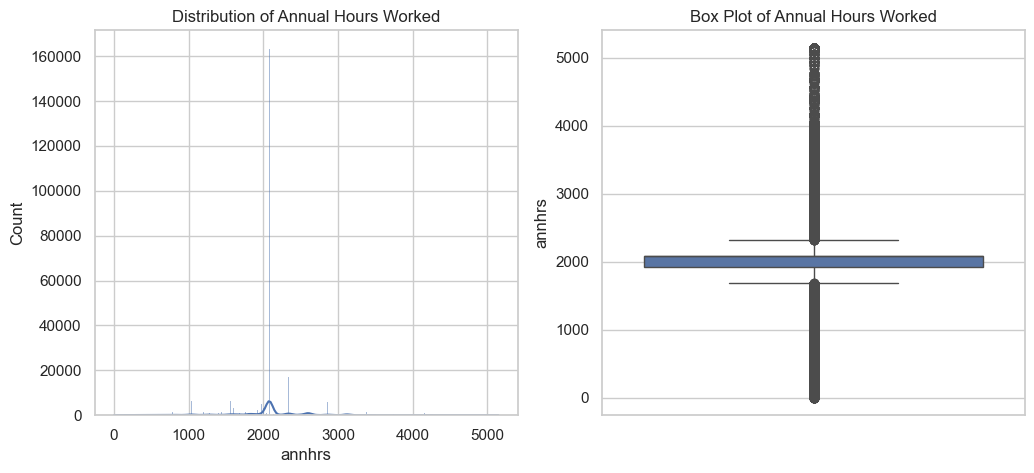

In [72]:
# For demonstration, let's assume you have your DataFrame named imputd_data
sns.set(style="whitegrid")

# 1. Distribution Plot and Box Plot for `annhrs`
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(imputed_data['annhrs'], kde=True)
plt.title("Distribution of Annual Hours Worked")
plt.xlabel("annhrs")

plt.subplot(1, 2, 2)
sns.boxplot(y=imputed_data['annhrs'])
plt.title("Box Plot of Annual Hours Worked")
plt.ylabel("annhrs")
plt.show()

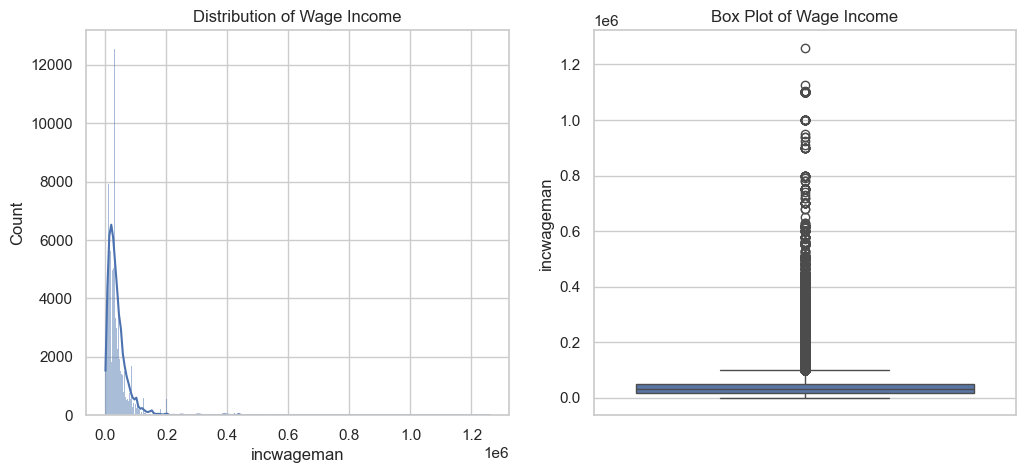

In [74]:
# 2. Distribution Plot and Box Plot for `incwageman`
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(imputed_data['incwageman'], kde=True)
plt.title("Distribution of Wage Income")
plt.xlabel("incwageman")

plt.subplot(1, 2, 2)
sns.boxplot(y=imputed_data['incwageman'])
plt.title("Box Plot of Wage Income")
plt.ylabel("incwageman")
plt.show()

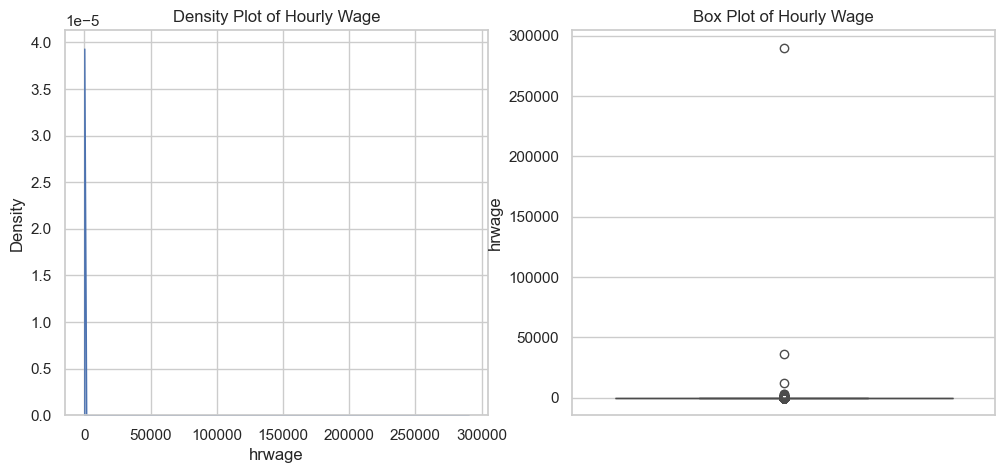

In [76]:
# 3. Density Plot and Box Plot for `hrwage`
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.kdeplot(imputed_data['hrwage'], fill=True)
plt.title("Density Plot of Hourly Wage")
plt.xlabel("hrwage")

plt.subplot(1, 2, 2)
sns.boxplot(y=imputed_data['hrwage'])
plt.title("Box Plot of Hourly Wage")
plt.ylabel("hrwage")
plt.show()

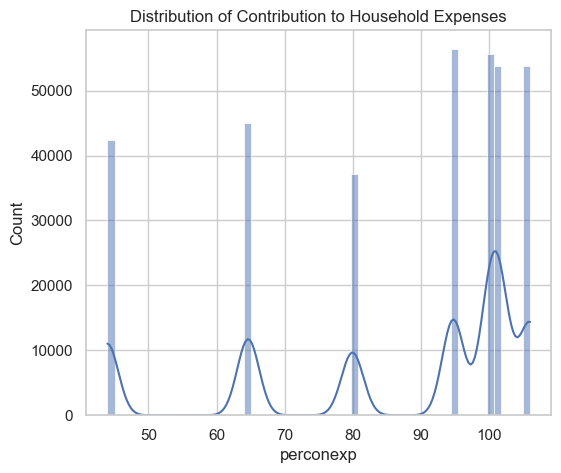

In [77]:
# 4. Histogram for `perconexp`
plt.figure(figsize=(6, 5))
sns.histplot(imputed_data['perconexp'], kde=True)
plt.title("Distribution of Contribution to Household Expenses")
plt.xlabel("perconexp")
plt.show()

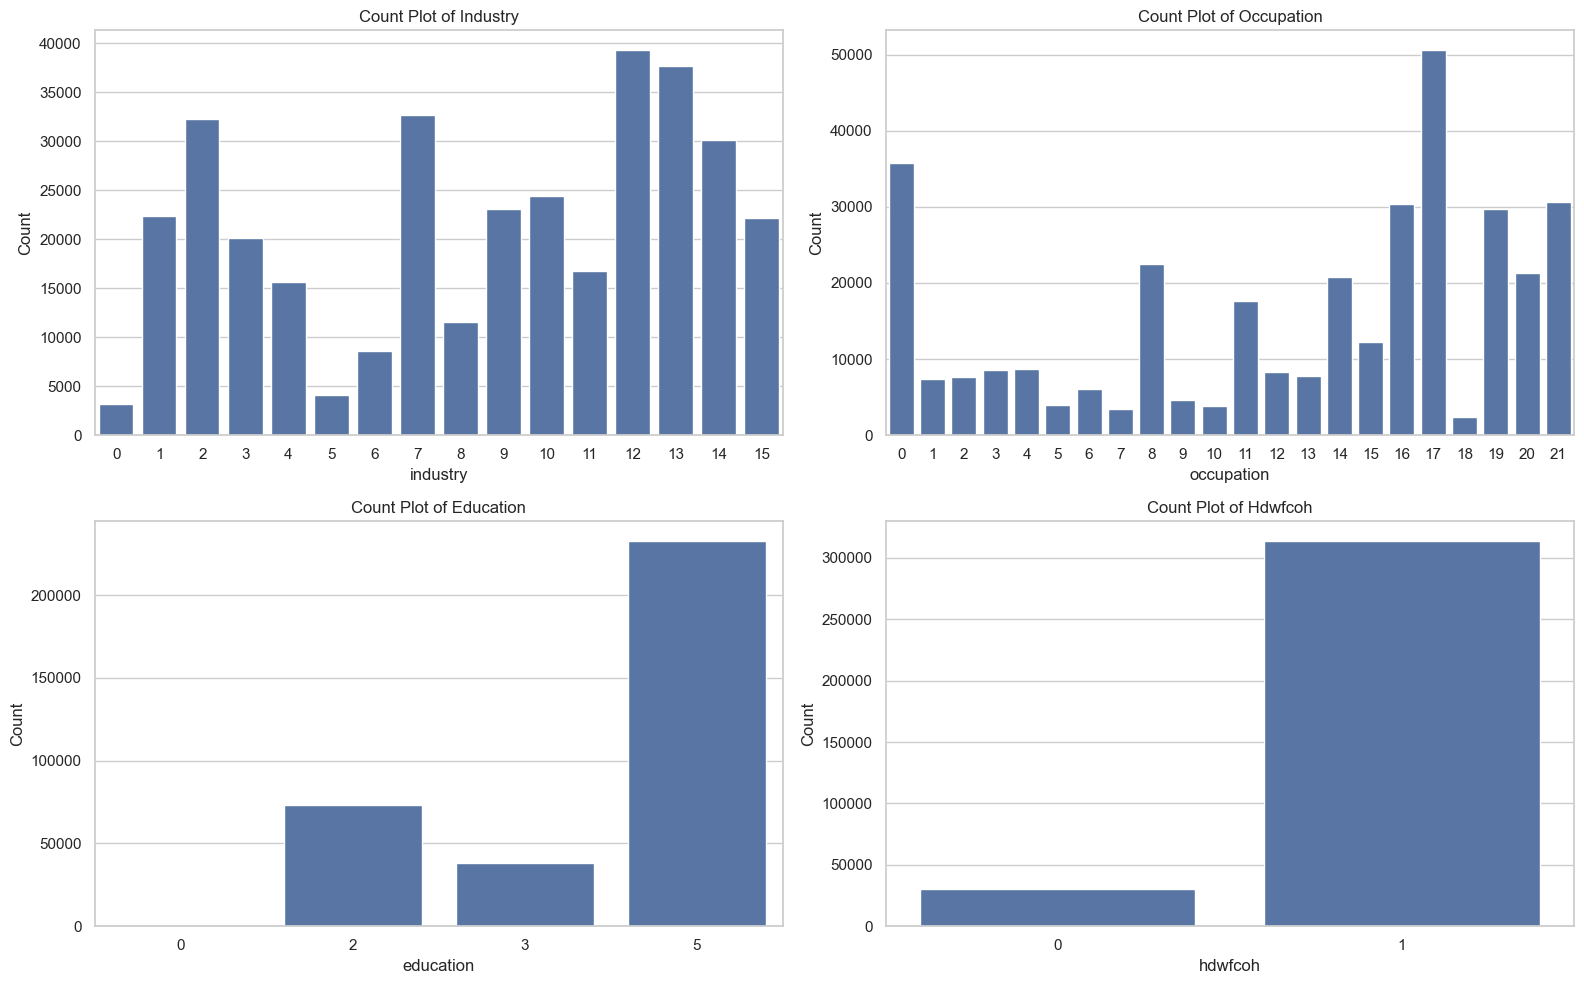

In [78]:
# 5. Count Plots for Categorical Columns
categorical_columns = ['industry', 'occupation', 'education', 'hdwfcoh']
plt.figure(figsize=(16, 10))

for i, column in enumerate(categorical_columns, 1):
    plt.subplot(2, 2, i)
    sns.countplot(x=imputed_data[column])
    plt.title(f"Count Plot of {column.capitalize()}")
    plt.xlabel(column)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

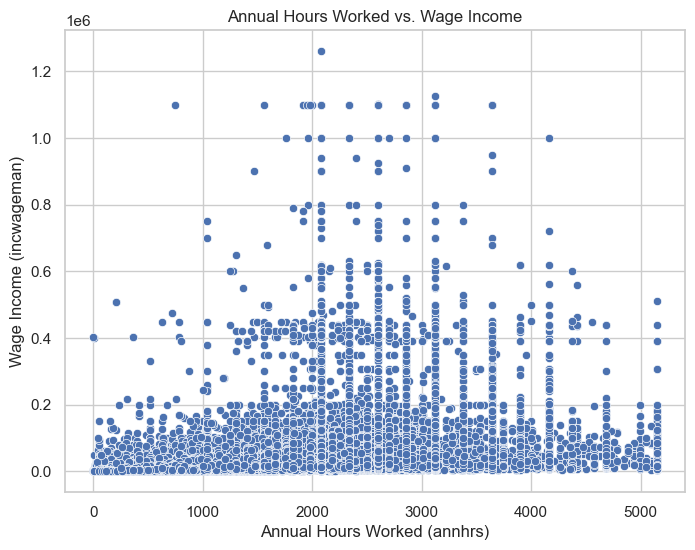

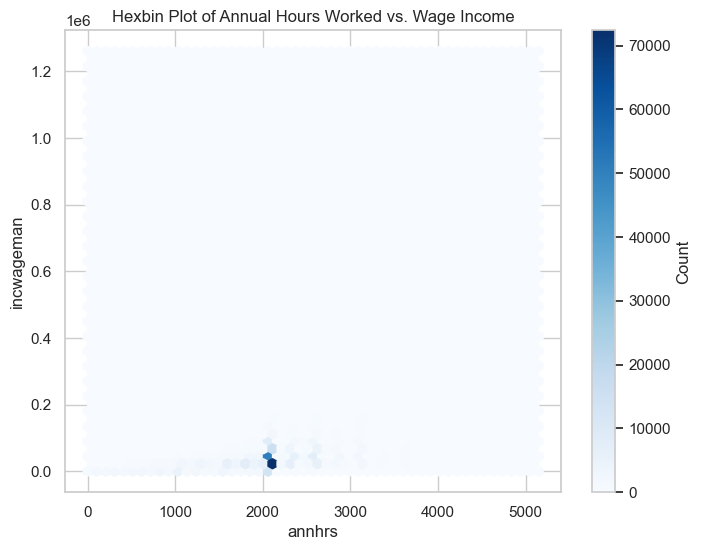

In [79]:
sns.set(style="whitegrid")

# Bivariate Analysis
# 1. Scatter Plot for `annhrs` vs `incwageman`
plt.figure(figsize=(8, 6))
sns.scatterplot(data=imputed_data, x='annhrs', y='incwageman')
plt.title("Annual Hours Worked vs. Wage Income")
plt.xlabel("Annual Hours Worked (annhrs)")
plt.ylabel("Wage Income (incwageman)")
plt.show()

# Hexbin Plot for large dataset `annhrs` vs `incwageman`
plt.figure(figsize=(8, 6))
plt.hexbin(imputed_data['annhrs'], imputed_data['incwageman'], gridsize=50, cmap='Blues')
plt.colorbar(label='Count')
plt.title("Hexbin Plot of Annual Hours Worked vs. Wage Income")
plt.xlabel("annhrs")
plt.ylabel("incwageman")
plt.show()

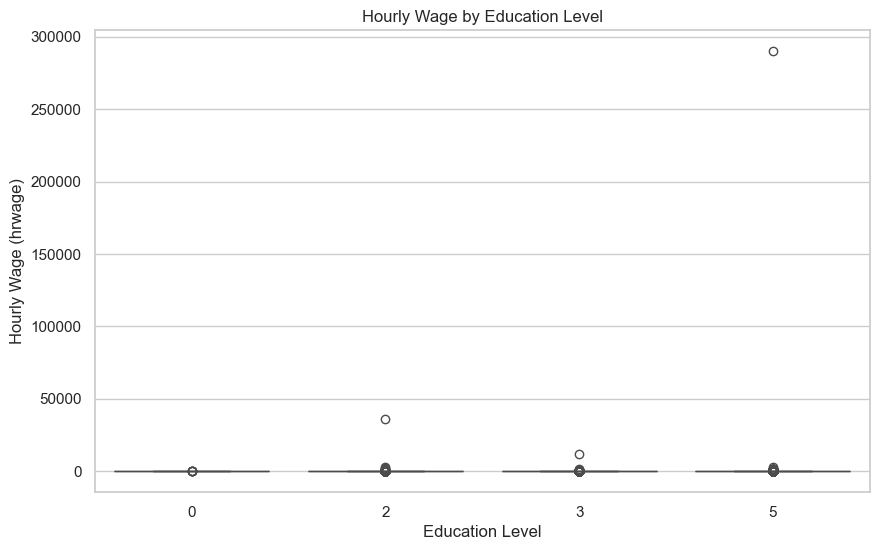

In [80]:
# 2. Box Plot for `hrwage` vs `education`
plt.figure(figsize=(10, 6))
sns.boxplot(data=imputed_data, x='education', y='hrwage')
plt.title("Hourly Wage by Education Level")
plt.xlabel("Education Level")
plt.ylabel("Hourly Wage (hrwage)")
plt.show()

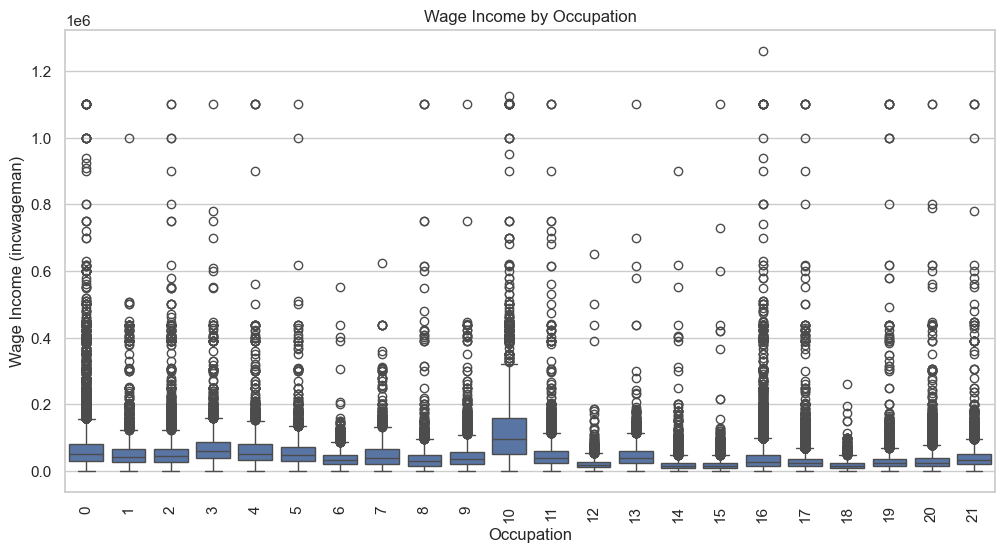

In [81]:
# 3. Box Plot for `incwageman` vs `occupation`
plt.figure(figsize=(12, 6))
sns.boxplot(data=imputed_data, x='occupation', y='incwageman')
plt.title("Wage Income by Occupation")
plt.xlabel("Occupation")
plt.ylabel("Wage Income (incwageman)")
plt.xticks(rotation=90)
plt.show()

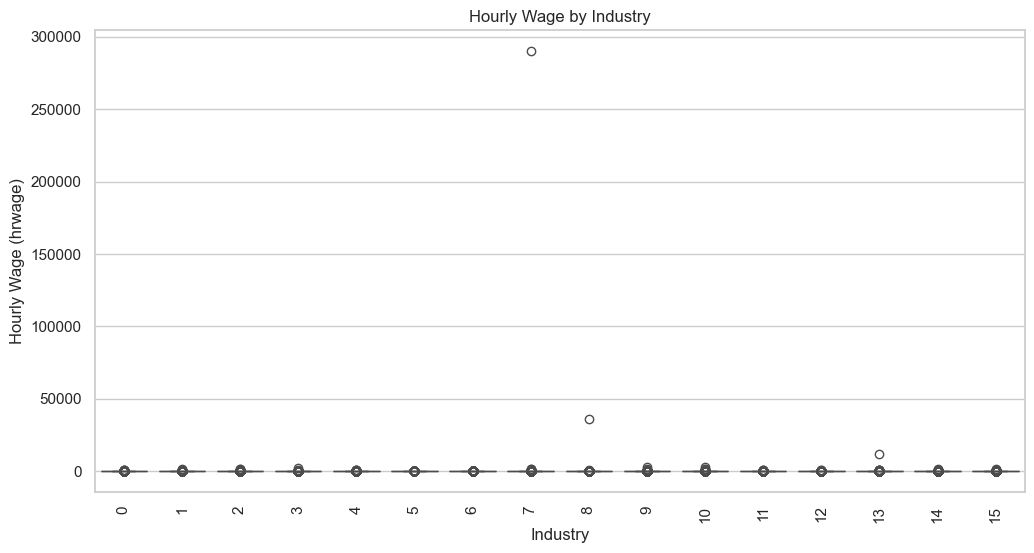

In [82]:
# 4. Box Plot for `industry` vs `hrwage`
plt.figure(figsize=(12, 6))
sns.boxplot(data=imputed_data, x='industry', y='hrwage')
plt.title("Hourly Wage by Industry")
plt.xlabel("Industry")
plt.ylabel("Hourly Wage (hrwage)")
plt.xticks(rotation=90)
plt.show()

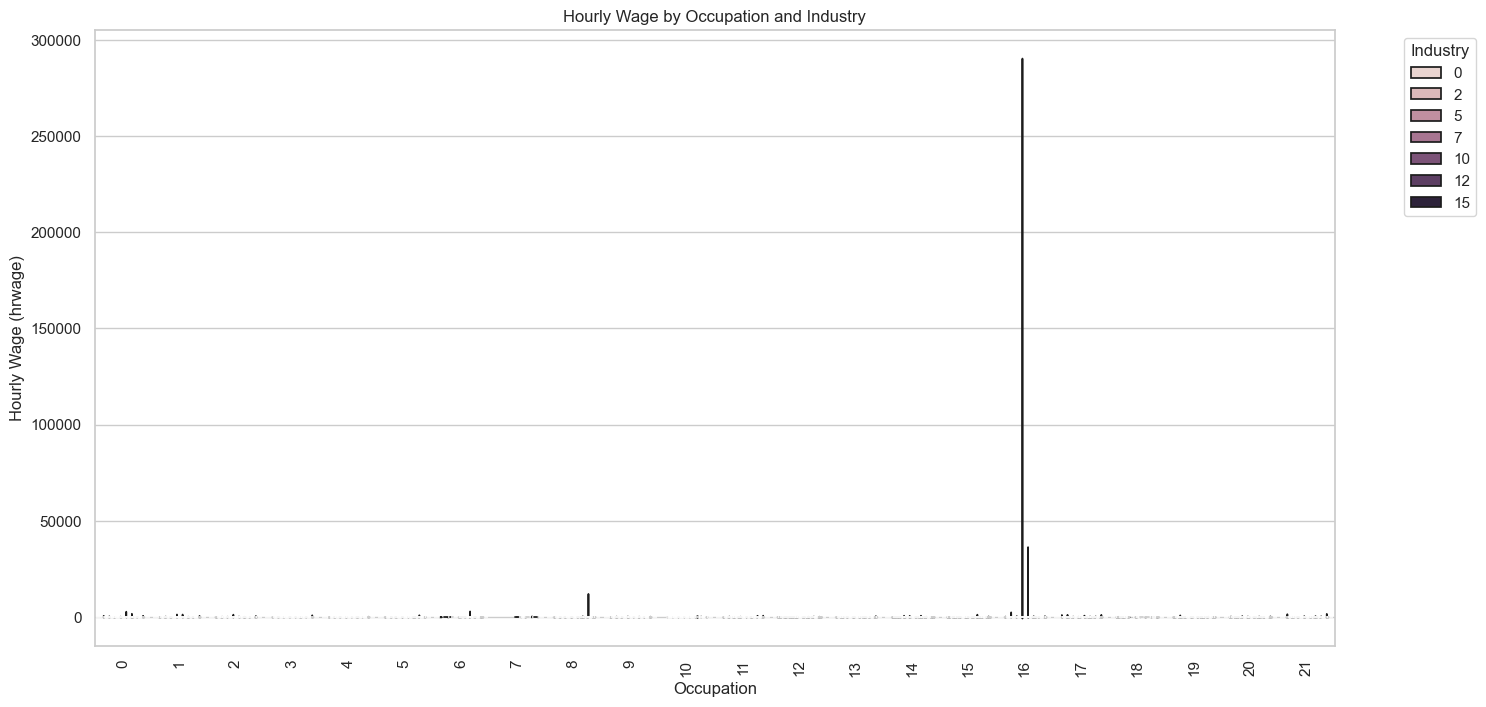

In [83]:
# Multivariate Analysis
# 1. Violin Plot for `hrwage` vs `occupation` by `industry`
plt.figure(figsize=(16, 8))
sns.violinplot(data=imputed_data, x='occupation', y='hrwage', hue='industry', split=True)
plt.title("Hourly Wage by Occupation and Industry")
plt.xlabel("Occupation")
plt.ylabel("Hourly Wage (hrwage)")
plt.xticks(rotation=90)
plt.legend(title="Industry", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

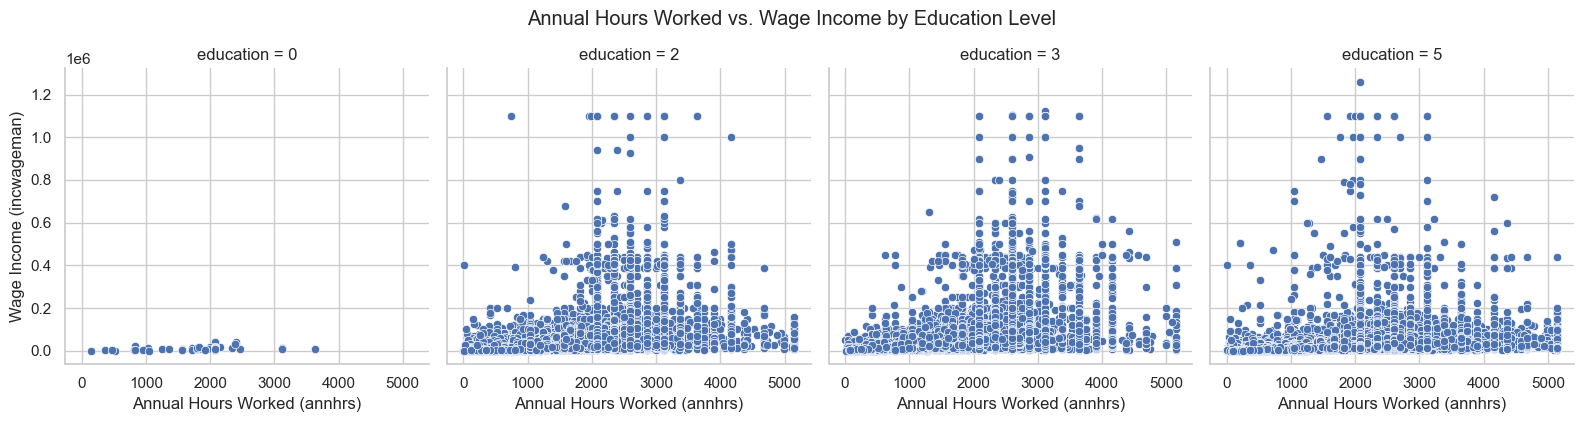

In [84]:
# 2. Facet Grid for `annhrs` vs `incwageman` by `education`
g = sns.FacetGrid(imputed_data, col='education', col_wrap=4, height=4)
g.map(sns.scatterplot, 'annhrs', 'incwageman')
g.set_axis_labels("Annual Hours Worked (annhrs)", "Wage Income (incwageman)")
g.fig.suptitle("Annual Hours Worked vs. Wage Income by Education Level", y=1.05)
plt.show()

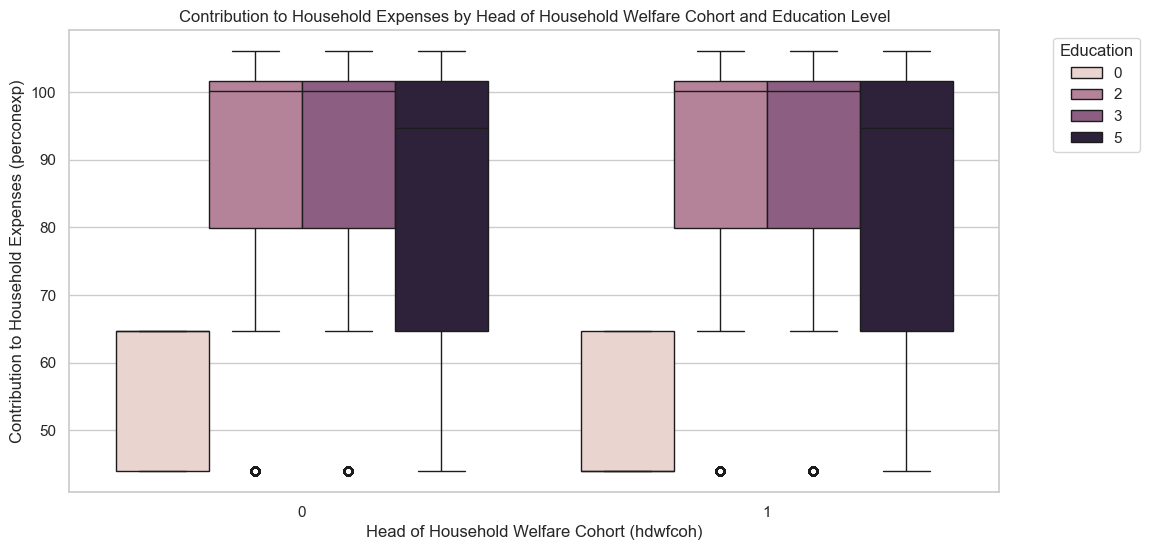

In [85]:
# 3. Box Plot for `perconexp` by `hdwfcoh` and `education`
plt.figure(figsize=(12, 6))
sns.boxplot(data=imputed_data, x='hdwfcoh', y='perconexp', hue='education')
plt.title("Contribution to Household Expenses by Head of Household Welfare Cohort and Education Level")
plt.xlabel("Head of Household Welfare Cohort (hdwfcoh)")
plt.ylabel("Contribution to Household Expenses (perconexp)")
plt.legend(title="Education", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

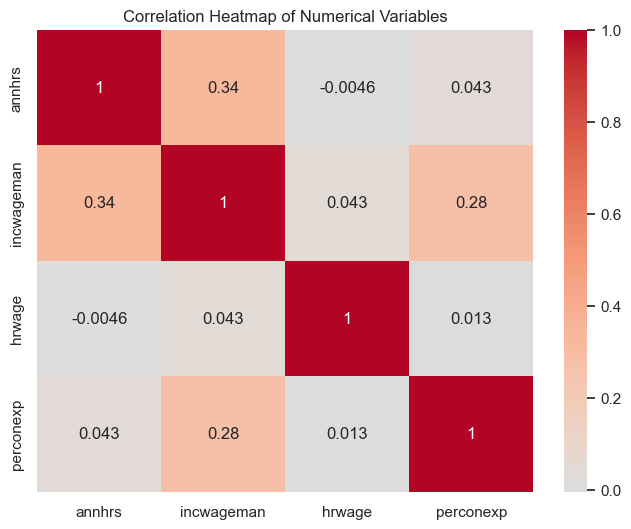

In [86]:
# Correlation Analysis
# Correlation Heatmap for numerical columns
plt.figure(figsize=(8, 6))
numerical_columns = ['annhrs', 'incwageman', 'hrwage', 'perconexp']
correlation_matrix = imputed_data[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()